## Adagrad, RMSProp, and Adam

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0, 20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
y = -2 * X + 1
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### Plot your data points. 

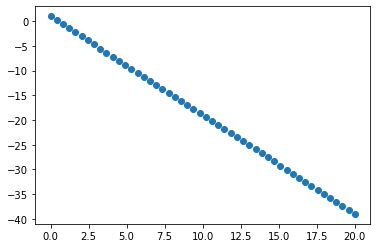

In [4]:
plt.scatter(X,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the hyperparameters and see the differnce in your results.

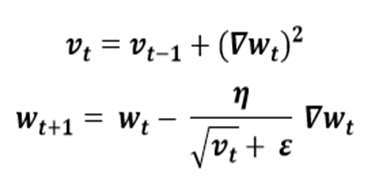

In [5]:
def adagrad(X, y, alpha, epsilon, epochs):
    
    loss = []
    thetas_0 = []
    thetas_1 = []
    theta_0 = 0
    theta_1 = 0
    m = float(len(X))
    iterations = 0
    v_prev_0 = v_prev_1 = 0

    for i in range(epochs):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * X
        j = (1/(2 * m)) * sum((h - y)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / m) * sum(h - y)
        gradient_theta_1 = (1 / m) * sum((h - y) * X)
        
        
        v_new_0 = v_prev_0 + (gradient_theta_0)**2
        v_new_1 = v_prev_1 + (gradient_theta_1)**2
        
        theta_0 = theta_0 - ((alpha / (np.sqrt(v_new_0) + epsilon)) * gradient_theta_0)
        theta_1 = theta_1 - ((alpha / (np.sqrt(v_new_1) + epsilon)) * gradient_theta_1)
        iterations += 1
        v_prev_0 = v_new_0
        v_prev_1 = v_new_1 
        iterations += 1
        
        
        if (abs(gradient_theta_0) + abs(gradient_theta_1)) < 0.0001:
             break
                
    return thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1]

In [6]:
thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1] = adagrad(X, y, 1, 1e-08, 100)

In [7]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])

0.07047698768041313
-1.929276922689445
0.11147203439175314


In [8]:
h = thetas_0[-1] + thetas_1[-1] * X

In [9]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9983934912690601

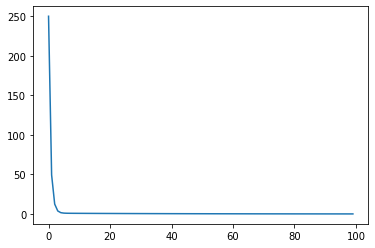

In [10]:
plt.plot(range(100), loss)

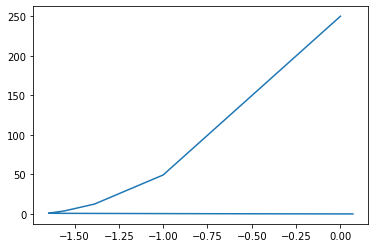

In [11]:
plt.plot(thetas_0, loss)
plt.show()

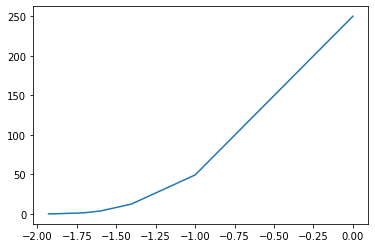

In [12]:
plt.plot(thetas_1, loss)
plt.show()

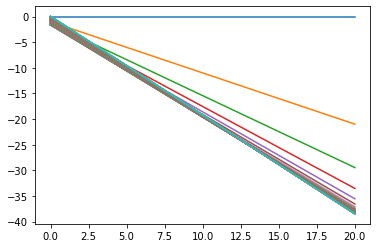

In [13]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

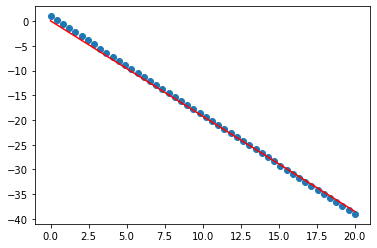

In [14]:
plt.scatter(X,y)
plt.plot(X, h, color='red')

#### We observe that we need a high learning rate because by iterations it keeps decaying till it vanishes and this is the problem with ADAGRAD

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

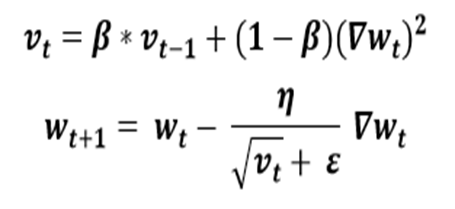

In [15]:
def RMSProp(X, y, alpha, beta, epsilon, epochs):
    
    loss = []
    thetas_0 = []
    thetas_1 = []
    theta_0 = 0
    theta_1 = 0
    m = float(len(X))
    iterations = 0
    v_prev_0 = v_prev_1 = 0

    for i in range(epochs):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * X
        j = (1/(2 * m)) * sum((h - y)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / m) * sum(h - y)
        gradient_theta_1 = (1 / m) * sum((h - y) * X)
        v_new_0 = beta * v_prev_0 + (1 - beta) * (gradient_theta_0)**2
        v_new_1 = beta * v_prev_1 + (1 - beta) * (gradient_theta_1)**2
        theta_0 = theta_0 - ((alpha / (np.sqrt(v_new_0) + epsilon)) * gradient_theta_0)
        theta_1 = theta_1 - ((alpha / (np.sqrt(v_new_1) + epsilon)) * gradient_theta_1)
        iterations += 1
        v_prev_0 = v_new_0
        v_prev_1 = v_new_1 
        iterations += 1
        
        
        if (abs(gradient_theta_0) + abs(gradient_theta_1)) < 0.0001:
             break
                
    return thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1]

In [16]:
thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1] = RMSProp(X, y, 0.1, 0.9, 1e-08, 100)

In [17]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])

0.8759355579838018
-1.9834657654171488
0.005594254635949686


In [18]:
h = thetas_0[-1] + thetas_1[-1] * X

In [19]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9999193769184819

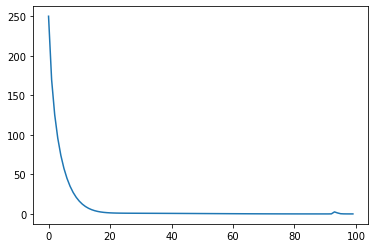

In [20]:
plt.plot(range(100), loss)

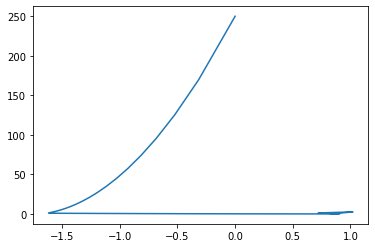

In [21]:
plt.plot(thetas_0, loss)

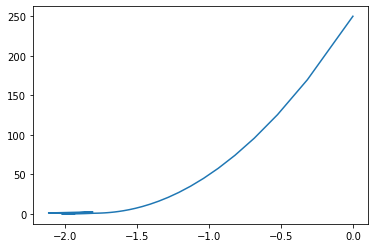

In [22]:
plt.plot(thetas_1, loss)

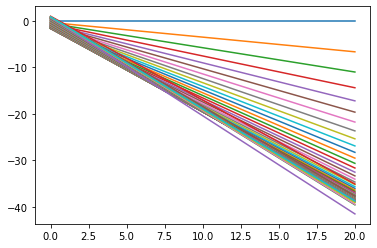

In [23]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

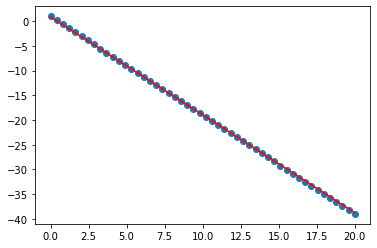

In [24]:
plt.scatter(X,y)
plt.plot(X, h, color='red')

#### We observe that with the same number of epochs and lower learning rate we reached better results in RMSProb than Adagrad

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

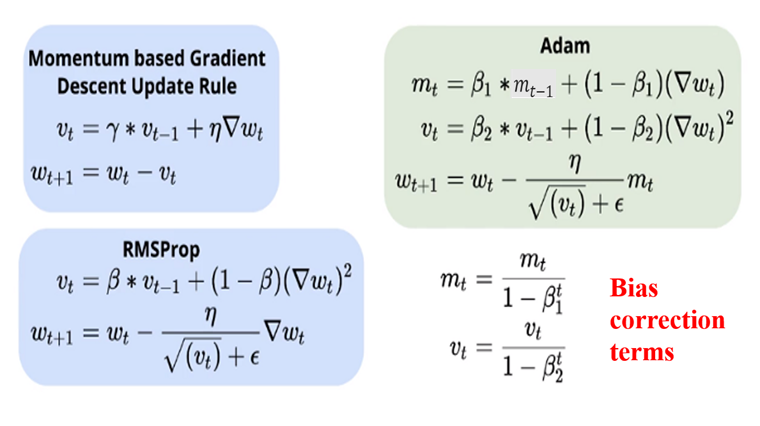

In [25]:
def Adam(X, y, alpha, beta1, beta2, epsilon, epochs):
    
    loss = []
    thetas_0 = []
    thetas_1 = []
    theta_0 = 0
    theta_1 = 0
    m = float(len(X))
    iterations = 0
    v_prev_0 = v_prev_1 = 0
    m_prev_0 = m_prev_1 = 0

    for i in range(epochs):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        h = theta_0 + theta_1 * X
        j = (1/(2 * m)) * sum((h - y)**2) 
        loss.append(j)
        gradient_theta_0 = (1 / m) * sum(h - y)
        gradient_theta_1 = (1 / m) * sum((h - y) * X)
        m_new_0 = beta1 * m_prev_0 + (1 - beta1) * (gradient_theta_0)
        m_new_1 = beta1 * m_prev_1 + (1 - beta1) * (gradient_theta_1)
        v_new_0 = beta2 * v_prev_0 + (1 - beta2) * (gradient_theta_0)**2
        v_new_1 = beta2 * v_prev_1 + (1 - beta2) * (gradient_theta_1)**2
        #bias correction factors
        #m_new_0 = m_new_0 / (1 - (beta1))
        #m_new_1 = m_new_1 / (1 - (beta1))
        #v_new_0 = v_new_0 / (1 - (beta2))
        #v_new_0 = v_new_0 / (1 - (beta2))

        theta_0 = theta_0 - ((alpha / (np.sqrt(v_new_0) + epsilon)) * m_new_0)
        theta_1 = theta_1 - ((alpha / (np.sqrt(v_new_1) + epsilon)) * m_new_1)
        iterations += 1
        v_prev_0 = v_new_0
        v_prev_1 = v_new_1 
        iterations += 1
        
        
        if (abs(gradient_theta_0) + abs(gradient_theta_1)) < 0.0001:
             break
                
    return thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1]

In [26]:
thetas_0, thetas_1, loss, h, thetas_0[-1], thetas_1[-1] = Adam(X, y, 0.1, 0.9, 0.999, 1e-08, 1000)

In [27]:
print(thetas_0[-1])
print(thetas_1[-1])
print(loss[-1])

0.7672789956813099
-1.9822920014399017
0.006987496809600226


In [28]:
h = thetas_0[-1] + thetas_1[-1] * X

In [29]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9998992978400969

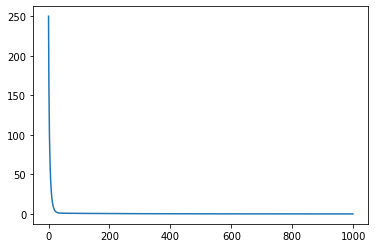

In [30]:
plt.plot(range(1000), loss)

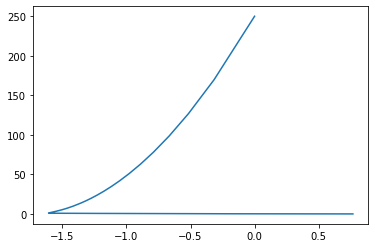

In [31]:
plt.plot(thetas_0, loss)

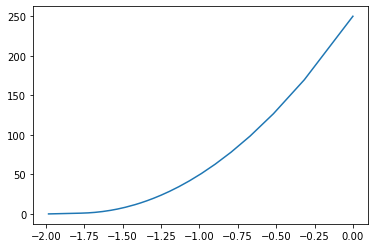

In [32]:
plt.plot(thetas_1, loss)

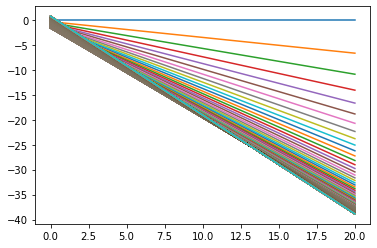

In [33]:
for i in range(len(thetas_0)):
    h = thetas_0[i] + thetas_1[i] * X
    plt.plot(X, h)
plt.show()

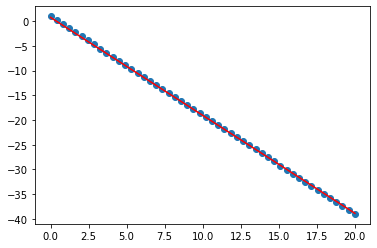

In [34]:
plt.scatter(X,y)
plt.plot(X, h, color='red')